##                  **NOTE**



We first tried LSTM by ourselves,
since it didn't give a good result, we took a paper as baseline and implemented their VARMAX modle.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/yellow.csv')

In [ ]:
def ploting(dataframe):
    plt.plot(dataframe.LON, dataframe.LAT)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')
    plt.title('trajectory')
    plt.show()

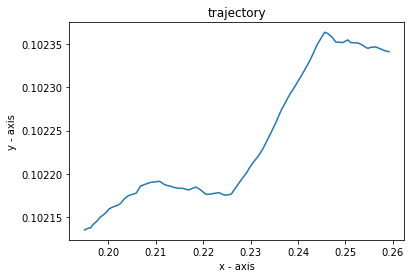

In [ ]:
ploting(df)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.shape

(78, 2)

In [ ]:
cols = list(df)[0:2]

In [ ]:
cols

['LAT', 'LON']

In [ ]:
df_for_training = df[cols].astype(float)

In [ ]:
trainX = []
trainY = []

trainX = df_for_training[0:50]
trainY = df_for_training[50:78]

In [ ]:
trainX

,LAT,LON
0,0.102341,0.259219
1,0.102342,0.258435
2,0.102346,0.256404
3,0.102346,0.255360
4,0.102345,0.254760
5,0.102346,0.254316
6,0.102349,0.253522
7,0.102351,0.252724
8,0.102351,0.251130
9,0.102355,0.250506


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
ad_fuller_result_1 = adfuller(df['LAT'].diff()[1:])

print('realLAT')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['LON'].diff()[1:])

print('realLON')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realLAT
ADF Statistic: -2.833589408750945
p-value: 0.05363363117802854

---------------------

realLON
ADF Statistic: -7.960418563849911
p-value: 2.9588854993666724e-12


In [ ]:
print('LAT causes LON?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['LAT', 'LON']], 4)

print('\LON causes LAT?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['LON', 'LAT']], 4)

LAT causes LON?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0426  , p=0.8370  , df_denom=74, df_num=1
ssr based chi2 test:   chi2=0.0443  , p=0.8332  , df=1
likelihood ratio test: chi2=0.0443  , p=0.8332  , df=1
parameter F test:         F=0.0426  , p=0.8370  , df_denom=74, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4931  , p=0.2316  , df_denom=71, df_num=2
ssr based chi2 test:   chi2=3.1965  , p=0.2023  , df=2
likelihood ratio test: chi2=3.1311  , p=0.2090  , df=2
parameter F test:         F=1.4931  , p=0.2316  , df_denom=71, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7561  , p=0.5226  , df_denom=68, df_num=3
ssr based chi2 test:   chi2=2.5019  , p=0.4750  , df=3
likelihood ratio test: chi2=2.4610  , p=0.4824  , df=3
parameter F test:         F=0.7561  , p=0.5226  , df_denom=68, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test: 

In [ ]:
macro_data = df[['LAT','LON']]
print(macro_data.shape)

(78, 2)


In [ ]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [ ]:
train_df.shape

(66, 2)

In [ ]:
test_df.shape

(12, 2)

In [ ]:
model = VAR(train_df.diff()[1:])

In [ ]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -40.22      -40.14   3.409e-18      -40.19
1       -41.07     -40.83*   1.452e-18      -40.98
2       -41.08      -40.68  1.440e-18*      -40.93
3       -41.01      -40.45   1.558e-18      -40.80
4       -40.99      -40.27   1.595e-18      -40.72
5       -40.86      -39.98   1.826e-18      -40.54
6       -40.87      -39.83   1.840e-18      -40.48
7       -40.73      -39.52   2.166e-18      -40.28
8       -40.59      -39.23   2.545e-18      -40.08
9       -40.46      -38.93   3.002e-18      -39.89
10      -40.40      -38.72   3.322e-18      -39.77
11      -40.32      -38.47   3.833e-18      -39.63
12      -40.42      -38.41   3.712e-18      -39.67
13      -40.62      -38.45   3.329e-18      -39.81
14      -40.74      -38.41   3.292e-18      -39.87
15      -40.81      -38.32   3.549e-18      -39.88
16      -41.30      -38.65   2.

In [ ]:
var_model = VARMAX(train_df, order=(4,0), enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:         ['LAT', 'LON']   No. Observations:                   66
Model:                         VAR(4)   Log Likelihood                 735.521
                          + intercept   AIC                          -1429.041
Date:                Tue, 22 Nov 2022   BIC                          -1383.059
Time:                        11:59:19   HQIC                         -1410.871
Sample:                             0                                         
                                 - 66                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):           65.81, 60.35   Jarque-Bera (JB):           8.75, 3.20
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.01, 0.20
Heteroskedasticity (H):         0.27, 4.56   Skew:                      0.27, -0.42
Prob(H) (two-sided):            0.00,

In [ ]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)
predictions=predict.predicted_mean

In [ ]:
predictions.columns=['LAT_predicted','LON_predicted']
predictions

,LAT_predicted,LON_predicted
66,0.102237,0.231381
67,0.102238,0.231469
68,0.102238,0.231558
69,0.102238,0.231647
70,0.102238,0.231738
71,0.102238,0.231739
72,0.102238,0.231740
73,0.102238,0.231740
74,0.102238,0.231741
75,0.102238,0.231741


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

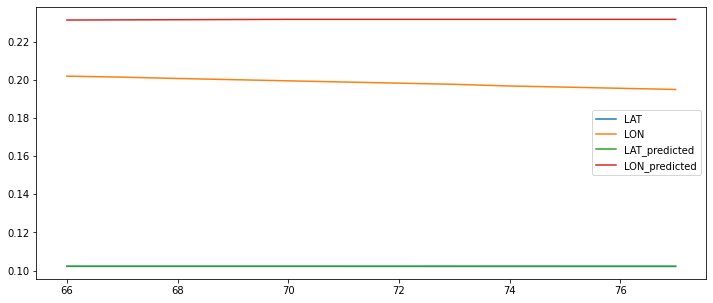

In [ ]:
test_vs_pred.plot(figsize=(12,5))

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_LAT=math.sqrt(mean_squared_error(predictions['LAT_predicted'],test_df['LAT']))
print('Mean value of LAT is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['LAT']),rmse_LAT))

rmse_LON=math.sqrt(mean_squared_error(predictions['LON_predicted'],test_df['LON']))
print('Mean value of LON is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['LON']),rmse_LON))

Mean value of LAT is : 0.10215058008333333. Root Mean Squared Error is :8.798863581087904e-05
Mean value of LON is : 0.19850707. Root Mean Squared Error is :0.03323830439148077


In [ ]:
test_vs_pred.columns

Index(['LAT', 'LON', 'LAT_predicted', 'LON_predicted'], dtype='object')

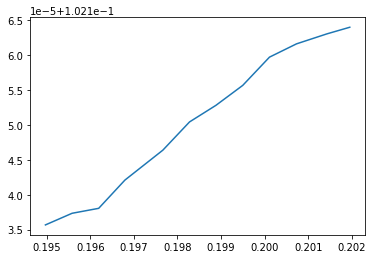

In [ ]:
plt.plot(test_vs_pred.LON,test_vs_pred.LAT)

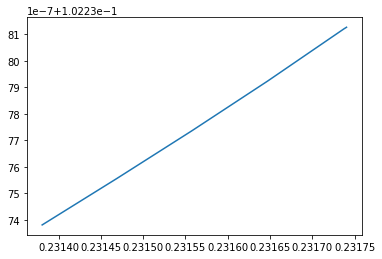

In [ ]:
plt.plot(test_vs_pred.LON_predicted,test_vs_pred.LAT_predicted)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(test_vs_pred)
df_scaled = pd.DataFrame(df_scaled, columns=['LAT', 'LON', 'LAT_predicted', 'LON_predicted'])

In [ ]:
df_scaled

,LAT,LON,LAT_predicted,LON_predicted
0,1.000000,1.000000,0.000000,0.000000
1,0.966514,0.924948,0.234715,0.245175
2,0.915968,0.824968,0.476348,0.492030
3,0.848784,0.736188,0.727710,0.740720
4,0.705851,0.648296,0.992391,0.992021
5,0.605005,0.560268,0.995362,0.995190
6,0.520973,0.473469,0.997624,0.997564
7,0.378216,0.385850,0.999162,0.999149
8,0.226859,0.261217,0.999955,0.999952
9,0.083891,0.175032,0.999979,0.999977


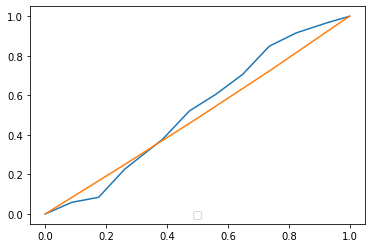

In [ ]:
plt.plot(df_scaled.LON,df_scaled.LAT)
plt.plot(df_scaled.LON_predicted,df_scaled.LAT_predicted);
plt.legend(loc=8)